# Derive noise level map

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import healpy as hp
col = np.array([
    plt.cm.Reds(np.linspace(0.3, .6, 128)), 
    plt.cm.Blues(np.linspace(0.6, 1., 128)), 
    plt.cm.Reds(np.linspace(0.8, 1., 128)), 
    plt.cm.Wistia(np.linspace(0.4, 1., 128)), 
    plt.cm.Greens(np.linspace(0.6, 1., 128)), 
    plt.cm.Greys(np.linspace(0.8, 1.0, 128)), 
    plt.cm.Greys(np.linspace(0.9, 1.0, 128))])

rotation = 0
lonra = np.array([-180,120])
latra = np.array([-90,30])

In [101]:
fg='00'
dset = 's08b'
gdir_loc = '/project/projectdirs/cmbs4/awg/lowellbb/'
if dset == 's08b':
    'SP setting'
    # TODO use s08X_mask
    mask = np.nan_to_num(hp.read_map(gdir_loc+'reanalysis/foreground_cleaned_maps/08b.%s_umilta_210511/'%fg + 'ILC_mask_08b_smooth_30arcmin.fits'))
    rhits = np.nan_to_num(hp.read_map(gdir_loc+'expt_xx/08b/rhits/n2048.fits'))
    CENTRAL_NOISE = 0.42
elif dset == 's08d':
    'Chile setting'
    mask = np.nan_to_num(hp.read_map(gdir_loc+'reanalysis/foreground_cleaned_maps/08d.%s_umilta_220502/'%fg + 'ILC_mask_08d_smooth_30arcmin.fits'))
    rhits = np.nan_to_num(hp.read_map(gdir_loc+'expt_xx/08d/rhits/n2048.fits'))
    CENTRAL_NOISE = 0.59
else:
    print("WARNING: not dset {} not yet supported.".format(dset))

pixlev = CENTRAL_NOISE / (np.sqrt(hp.nside2pixarea(2048, degrees=True)) * 60.)
ninv_p = 1./ pixlev ** 2 * rhits

arcmin = 180. * 60. / np.pi
rad_sky = 4. * np.pi * max(rhits)

# For each ratio, calculate average noiselevels

In [102]:
ratios = [1.01,1.2,2,5,50,500,np.inf]
rat_nlev = dict()

for rat in ratios:
    noisemap = np.where(rhits / max(rhits) < 1. / rat, 0., ninv_p)  *(~np.isnan(rhits))
    nlev_patch = np.sqrt(rad_sky / len(noisemap) / noisemap) * arcmin
    nlev_patch_avg = np.sqrt(rad_sky / len(noisemap) / np.sum(noisemap) * len(noisemap[noisemap!=0.0])) * arcmin
    nlev_patch_max = np.max(nlev_patch[nlev_patch!=np.inf])
    
    fsky = np.nansum(noisemap)/len(noisemap)
    rat_nlev.update({rat:(nlev_patch_avg,nlev_patch_max)})
    
    print('ratio %f: noise avg (max) : %.2f (%.2f), fsky: %.3f'%(rat, nlev_patch_avg, nlev_patch_max, fsky))

/global/homes/s/sebibel/.conda/envs/py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


ratio 1.010000: noise avg (max) : 0.42 (0.42), fsky: 0.002
ratio 1.200000: noise avg (max) : 0.44 (0.46), fsky: 0.100
ratio 2.000000: noise avg (max) : 0.48 (0.59), fsky: 0.224
ratio 5.000000: noise avg (max) : 0.55 (0.94), fsky: 0.296
ratio 50.000000: noise avg (max) : 0.64 (2.97), fsky: 0.317
ratio 500.000000: noise avg (max) : 0.68 (9.39), fsky: 0.318
ratio inf: noise avg (max) : 0.68 (186.31), fsky: 0.318


# Check for single rat value

/global/homes/s/sebibel/.conda/envs/py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


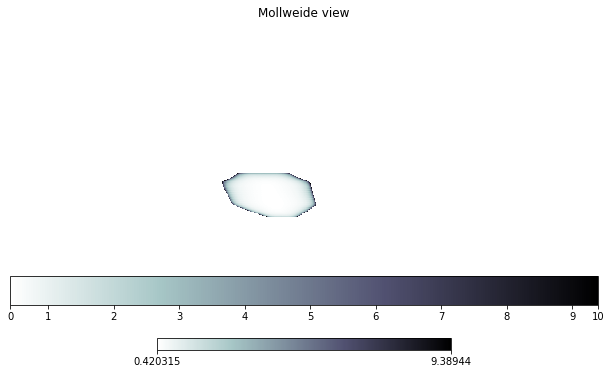

In [103]:
rat = 500
noisemap = np.where(rhits / max(rhits) < 1. / rat, 0., ninv_p)  *(~np.isnan(rhits))
nlev_patch = np.sqrt(rad_sky / len(noisemap) / noisemap) * arcmin

hp.mollview(nlev_patch, cmap='bone_r')

fig = plt.gcf()
ax = plt.gca()
image = ax.get_images()[0]
cmap = fig.colorbar(image, ax=ax, orientation='horizontal')

# Plot final map

## set proj_map on which contours are drawn

0.0 180.0 -180.0 180.0


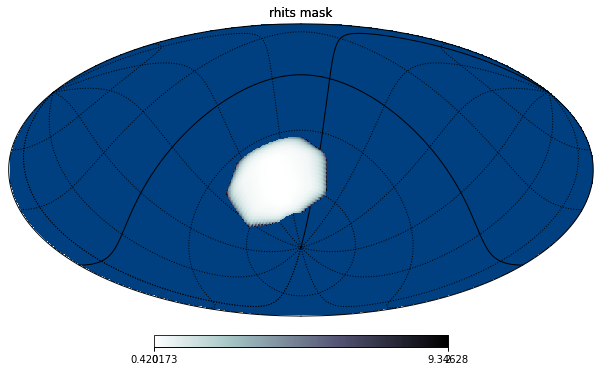

In [114]:
#s08d_mask
rot = [15,-50,0]
# proj_map = hp.mollview(rhits/max(rhits), title='rhits mask', return_projected_map=True, cmap='bone_r')
proj_map1 = hp.mollview(np.ones_like(nlev_patch), rot=rot, fig=1, title='rhits mask', return_projected_map=True, cmap='ocean', alpha=0.1*np.where(nlev_patch==np.inf,1,0))
hp.graticule()
proj_map2 = hp.mollview(nlev_patch, fig=1, rot=rot, title='rhits mask', return_projected_map=True, cmap='bone_r', alpha=np.where(nlev_patch==np.inf,0,1))

# Plot

/global/homes/s/sebibel/.conda/envs/py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


[0.42209455, 0.46008694, 0.59396964, 0.93914765, 2.9698393, 9.391475]


/global/homes/s/sebibel/.conda/envs/py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: The following kwargs were not used by contour: 'cbar'
  if sys.path[0] == '':


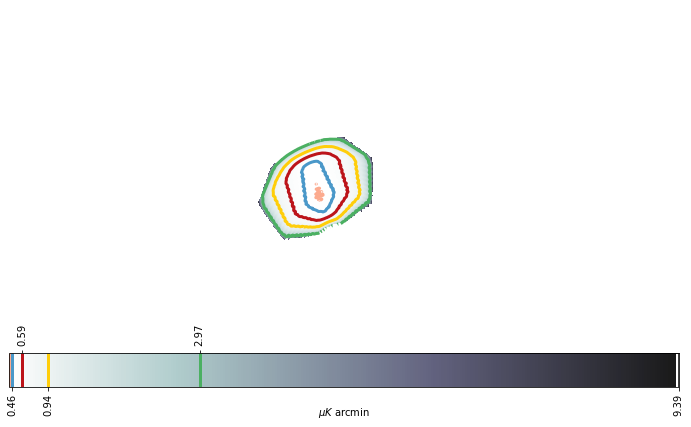

In [115]:
fig = plt.figure(figsize=(12,10))
# a_bg = plt.imshow(proj_map2, cmap='ocean', origin='lower', alpha=0.5)
a = plt.imshow(proj_map2, cmap='bone_r', origin='lower', alpha=0.9)
X, Y = np.mgrid[0:400:400j, 0:800:800j]

rat = 500
noisemap = np.where(rhits / max(rhits) < 1. / rat, 0., ninv_p)  *(~np.isnan(rhits))
nlev_patch = np.sqrt(rad_sky / len(noisemap) / noisemap) * arcmin

levels = [ratnlev[1] for ratnlev in list(rat_nlev.values())[:-1]]
print(levels)
plt.contour(Y, X, proj_map2, levels=levels, colors=col[:,0,:], alpha=1.0, linewidths=3, cbar=True)


allticks = [float('%.2f'%r[1]) for r in rat_nlev.values()]
cbar = fig.colorbar(a, orientation='horizontal',
                    ticks = allticks,
                    pad = 0.02)
cbar.set_label('$\mu K$ arcmin', verticalalignment='bottom')
for ticki, tick in enumerate(allticks):
    cbar.ax.vlines(tick,0,1, color=col[:,0,:][ticki], lw=3)
    
ax = plt.gca()
ax.axis('off')
labels = allticks[1:][::2]
cbar.set_ticks(labels)
cbar.ax.set_xticklabels(labels, rotation=90)
ax_t = cbar.ax.secondary_xaxis('top')
labels = allticks[::2]
ax_t.set_ticks(labels)
ax_t.set_xticklabels(labels, rotation=90)
plt.savefig('/global/homes/s/sebibel/notebooks/CMBS4/plots/masks.pdf', bbox_inches='tight')